In [1]:
import numpy as np
from skimage import io, filters
%matplotlib inline

In [2]:
def compare(left_im, right_im, w, h):
    x, y = left_im.shape
    from_around_px_x = -(w - 1) // 2
    to_around_px_x = ((w - 1) // 2) + 1
    from_around_px_y = -(h - 1) // 2
    to_around_px_y = ((h - 1) // 2) + 1
    res_img = np.zeros((x, y))
    for i in range(x):
        for j in range(y - 1):
            min_s = 1000000
            window_center_r = -1
            for r in range(j + 1, y):
                s = 0
                for k in range(from_around_px_x, to_around_px_x):
                    for l in range(from_around_px_y, to_around_px_y):
                        if 0 > i + k or i + k >= x or 0 > j + l or j + l >= y or r + k < 0 or r + l >= y:
                            continue
                        # S = ( L(r,q) - R(r,q) )^2
                        s += (float(left_im[i + k, j + l]) - float(right_im[i + k, r + l])) ** 2

                if min_s > s:
                    min_s = s
                    window_center_r = r
            if window_center_r != -1:
                disparity = window_center_r - j
                depth = 1.0 - (1.0 / disparity)
                res_img[i, j] = depth
    # apply median filter
    final_img = filters.median(res_img, np.ones((9, 9)))
    return final_img

In [3]:
def show_img(im):
    io.imshow(im)
    io.show()

/media/n0krashy/Nokrashy/PDF/ASU/4-Senior1/Spring/Vision/Assignment3/venv/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/media/n0krashy/Nokrashy/PDF/ASU/4-Senior1/Spring/Vision/Assignment3/venv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/media/n0krashy/Nokrashy/PDF/ASU/4-Senior1/Spring/Vision/Assignment3/venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


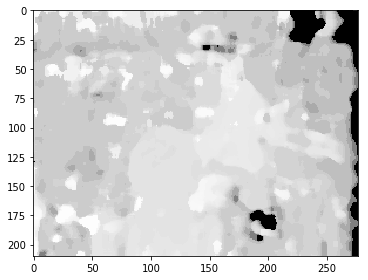

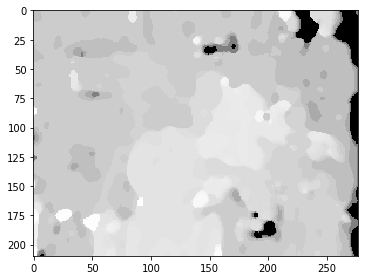

In [4]:
# question 2 tests
img1 = io.imread('Image1.png')
img2 = io.imread('Image2.png')

# output depth map image using a window of size 3 x 3
manipulated_img = compare(img1, img2, 3, 3)
show_img(manipulated_img)

# output depth map image using a window of size 7 x 7
manipulated_img = compare(img1, img2, 7, 7)
show_img(manipulated_img)